In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import torch
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
from read_results import read_varnames
import saprc99_code.kpp4py as kpp

nvar = 74
varnames = read_varnames("saprc99_code/saprc99_Parameters.f90")[0:nvar]
print(varnames)

['H2SO4', 'HCOOH', 'CCO_OH', 'RCO_OH', 'CCO_OOH', 'RCO_OOH', 'XN', 'XC', 'SO2', 'O1D', 'ALK1', 'BACL', 'PAN', 'PAN2', 'PBZN', 'MA_PAN', 'H2O2', 'N2O5', 'HONO', 'ALK2', 'ALK3', 'TBU_O', 'ALK5', 'ARO2', 'HNO4', 'COOH', 'HOCOO', 'BZNO2_O', 'MEOH', 'ALK4', 'ARO1', 'DCB2', 'DCB3', 'CRES', 'DCB1', 'NPHE', 'ROOH', 'BALD', 'PHEN', 'CO', 'MGLY', 'ACET', 'HNO3', 'ETHENE', 'GLY', 'BZ_O', 'ISOPRENE', 'R2O2', 'TERP', 'METHACRO', 'OLE1', 'ISOPROD', 'OLE2', 'MVK', 'CCHO', 'HCHO', 'RNO3', 'O3P', 'RCHO', 'MEK', 'PROD2', 'O3', 'HO2', 'RO2_N', 'MA_RCO3', 'C_O2', 'BZCO_O2', 'RO2_R', 'NO', 'NO2', 'NO3', 'CCO_O2', 'RCO_O2', 'OH']


In [3]:
df_range = (
    pd.read_csv('saprc99_range.csv', index_col=0)
    .append(pd.DataFrame(np.array([[0.0, 1.0]]), 
                         columns=['min','max'], 
                         index=['SUN']
                        )
           )
)

df_range['mid'] = 0.5*(df_range['min']+df_range['max'])
df_range['span'] = df_range['max'] - df_range['min']
df_range.tail(10)

,min,max,mid,span
C_O2,5.391452e+06,1.419437e+09,7.124145e+08,1.414046e+09
BZCO_O2,1.000000e-08,3.226580e+06,1.613290e+06,3.226580e+06
RO2_R,2.006049e+05,1.824368e+09,9.122844e+08,1.824168e+09
NO,1.006610e+05,9.000156e+11,4.500078e+11,9.000155e+11
NO2,5.003760e+09,1.461165e+12,7.330842e+11,1.456161e+12
NO3,1.742790e+06,1.039629e+10,5.199017e+09,1.039455e+10
CCO_O2,6.779490e+05,5.267318e+08,2.637049e+08,5.260539e+08
RCO_O2,7.110903e+04,3.979400e+08,1.990056e+08,3.978689e+08
OH,9.784155e+04,7.272688e+07,3.641236e+07,7.262904e+07
SUN,0.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00


In [4]:
df_range.loc[['PAN', 'ARO2', 'ARO1', 'HCHO', 'O3', 'NO', 'NO2', 'SUN']]

,min,max,mid,span
PAN,6.560740e+07,4.865127e+11,2.432891e+11,4.864471e+11
ARO2,1.000000e-08,1.323908e+11,6.619542e+10,1.323908e+11
ARO1,1.000000e-08,2.594001e+11,1.297000e+11,2.594001e+11
HCHO,1.708487e+10,6.853611e+11,3.512230e+11,6.682763e+11
O3,8.459007e+11,8.609433e+12,4.727667e+12,7.763533e+12
NO,1.006610e+05,9.000156e+11,4.500078e+11,9.000155e+11
NO2,5.003760e+09,1.461165e+12,7.330842e+11,1.456161e+12
SUN,0.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00


# Make training data

In [5]:
y0_list = np.random.uniform(df_range['min'] + 0.0*df_range['span'],
                           df_range['max'] - 0.0*df_range['span'], 
                           size=(5000, nvar+1))

y0_list.shape

(5000, 75)

In [6]:
%time y1_list = kpp.onestep(y0_list.T).T
y1_list.shape

CPU times: user 4.31 s, sys: 89.3 ms, total: 4.4 s
Wall time: 4.55 s


(5000, 74)

# Normalize data

In [7]:
normalizer = StandardScaler()
normalizer.fit(y0_list[:,0:74])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train = np.append(normalizer.transform(y0_list[:,0:74]), 
                    y0_list[:,-1:], 
                    axis=1)
X_train.shape

(5000, 75)

In [9]:
Y_train = normalizer.transform(y1_list)
Y_train.std(axis=0)

array([ 1.00086508,  1.0019292 ,  1.0000642 ,  1.00013228,  1.00004895,
        1.00006143,  1.08591126,  1.06176428,  0.9807967 ,  0.95219057,
        0.99483251,  1.03322506,  0.89675519,  0.93774564,  0.96948274,
        1.40758617,  0.95580883,  9.29988106,  0.4481116 ,  0.97887087,
        0.95464815,  0.95039342,  0.86283879,  0.73188006,  0.93327098,
        0.8962314 ,  0.87380066,  5.85924065,  0.98131998,  0.92187674,
        0.89903275,  0.85893877,  1.18327553,  0.27855966,  0.66427379,
        1.0487118 ,  0.83627756,  0.76529639,  0.36224989,  0.99902741,
        0.75789119,  0.99826674,  1.01215375,  0.83793203,  0.77306425,
        1.2240969 ,  0.26522207,  0.71233745,  0.09120506,  0.67925341,
        0.59031072,  0.54990758,  0.17298734,  0.87466198,  0.79174913,
        0.78752587,  0.93891254,  0.79260283,  0.77138641,  0.97512878,
        0.87010374,  0.94352971,  0.78742219,  0.83858168,  1.44029464,
        0.36871407,  0.58325816,  0.56341858,  0.16041235,  1.04

# Fit ANN

In [10]:
x_torch = Variable(torch.from_numpy(X_train).type(torch.FloatTensor))
y_torch = Variable(torch.from_numpy(Y_train).type(torch.FloatTensor))

In [11]:
H1, H2 = 100, 100

model = torch.nn.Sequential(
    torch.nn.Linear(75, H1),
    torch.nn.ReLU(),
    #torch.nn.Tanh(),
    #torch.nn.BatchNorm1d(H1),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    #torch.nn.Tanh(),
    #torch.nn.BatchNorm1d(H2),
    torch.nn.Linear(H2, 74)
)

In [12]:
loss_fn = torch.nn.MSELoss()

#optimizer = torch.optim.LBFGS(model.parameters(), lr=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002)

for t in range(4000):
    
    def closure():
        optimizer.zero_grad()
        y_pred = model(x_torch)
        loss = loss_fn(y_pred, y_torch)
        loss.backward()
        return loss
    optimizer.step(closure)
    
    if (t+1)%200==0:
        y_pred = model(x_torch)
        loss = loss_fn(y_pred, y_torch)
        print(t+1, loss.data[0])

200 0.24305635690689087
400 0.11342192441225052
600 0.07705645263195038
800 0.054559532552957535
1000 0.0419730618596077
1200 0.03913668543100357
1400 0.030331693589687347
1600 0.027442213147878647
1800 0.025136934593319893
2000 0.024006249383091927
2200 0.022761357948184013
2400 0.022375717759132385
2600 0.021023407578468323
2800 0.02010943740606308
3000 0.019473757594823837
3200 0.01910855807363987
3400 0.01861688122153282
3600 0.01801113598048687
3800 0.01780197210609913
4000 0.01767752505838871


In [13]:
%%time 
y_pred = model(x_torch)
y_pred_numpy = y_pred.data.numpy()

CPU times: user 14.7 ms, sys: 3.19 ms, total: 17.8 ms
Wall time: 12.1 ms


In [14]:
r2_score(y_pred_numpy, Y_train)

0.93919291887711265

(-20, 20)

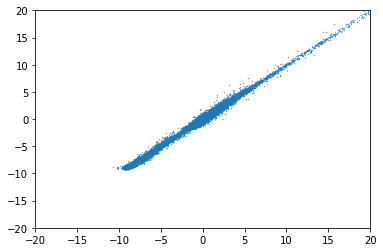

In [15]:
plt.scatter(y_pred_numpy.ravel(), Y_train.ravel(), s=0.1)
plt.xlim(-20,20)
plt.ylim(-20,20)

# Test set

In [16]:
y0_test = np.random.uniform(df_range['min'] + 0.0*df_range['span'],
                           df_range['max'] - 0.0*df_range['span'], 
                           size=(5000, nvar+1))

y0_list.shape

(5000, 75)

In [17]:
%time y1_test = kpp.onestep(y0_test.T).T

CPU times: user 4.38 s, sys: 63.6 ms, total: 4.44 s
Wall time: 4.42 s


In [18]:
X_test = np.append(normalizer.transform(y0_test[:,0:74]), 
                   y0_test[:,-1:], 
                   axis=1)
Y_test = normalizer.transform(y1_test)

In [19]:
%%time
X_torch_test = Variable(torch.from_numpy(X_test).type(torch.FloatTensor))
y_test_pred = model(X_torch_test).data.numpy()

CPU times: user 17.7 ms, sys: 3.97 ms, total: 21.7 ms
Wall time: 12.6 ms


In [20]:
r2_score(y_test_pred, Y_test)

0.89342756263567902

(-20, 20)

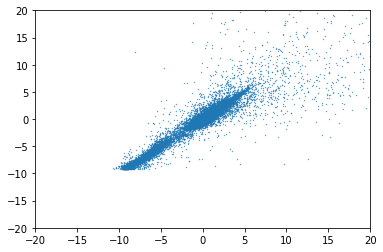

In [21]:
plt.scatter(y_test_pred, Y_test, s=0.1)
plt.xlim(-20,20)
plt.ylim(-20,20)

(-20, 20)

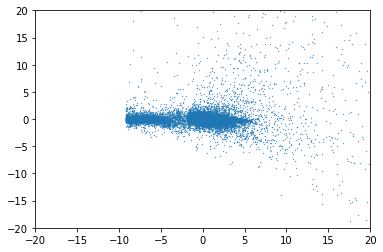

In [22]:
plt.scatter(Y_test, y_test_pred-Y_test, s=0.1)
plt.xlim(-20,20)
plt.ylim(-20,20)